Paso 1: Importar Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

Paso 2: Importar Datos


In [3]:
url = " https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

columnas = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

datos = pd.read_excel(url, names=columnas)



datos_trabajo = datos.copy()

# Visualizar las primeras filas
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Dimensiones del dataset: (768, 10)


Paso 3: Revisar Datos NAN


In [4]:
# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()


# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())

# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

=== ESTADÍSTICOS DESCRIPTIVOS ===
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.62

Paso 4: Limpiar Datos


In [5]:
# Ejemplo 1: Eliminar duplicados
datos_trabajo = datos_trabajo.drop_duplicates()

# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Paso 5: Realizar Gráficas para Analizar Tendencias


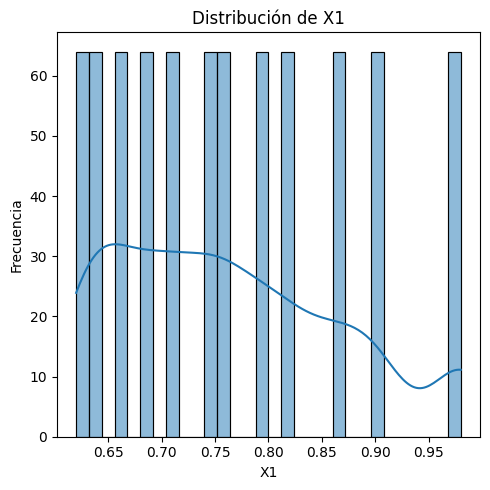

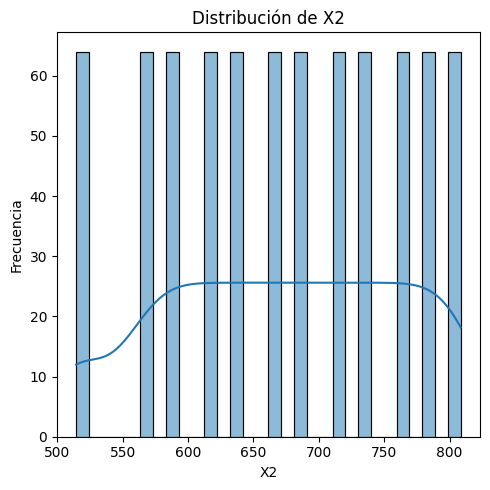

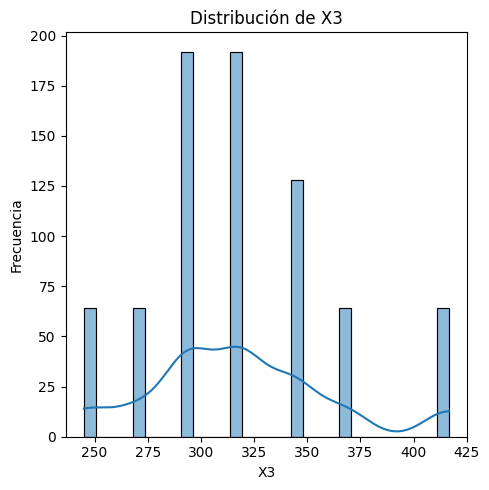

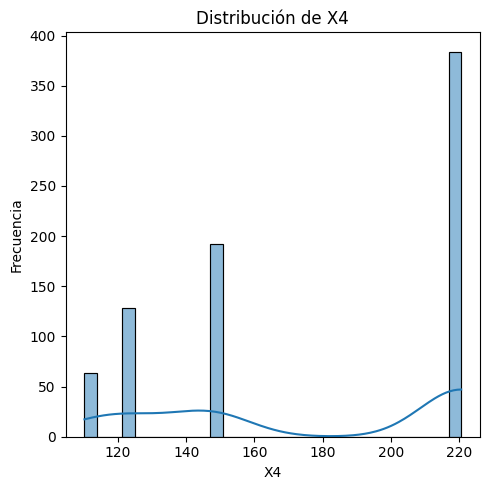

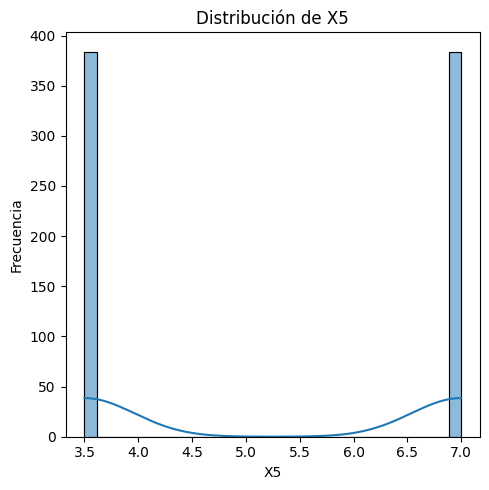

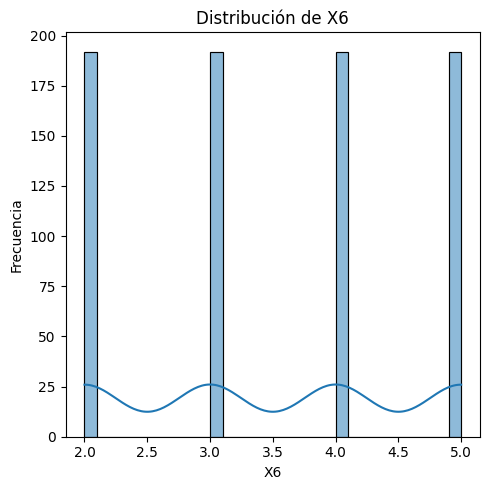

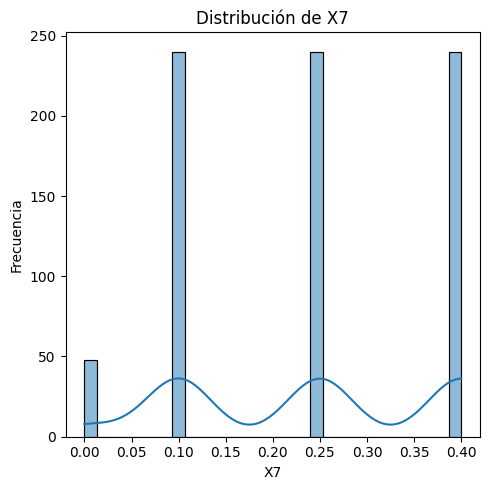

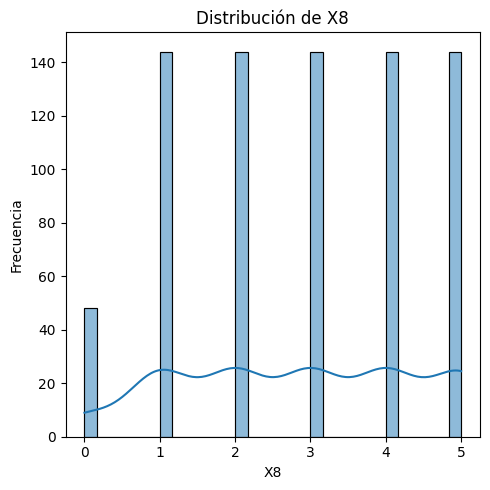

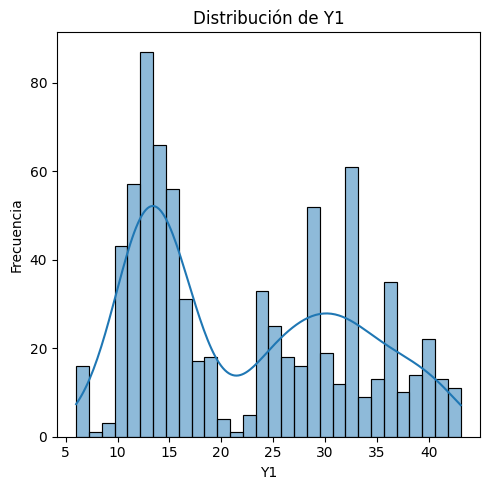

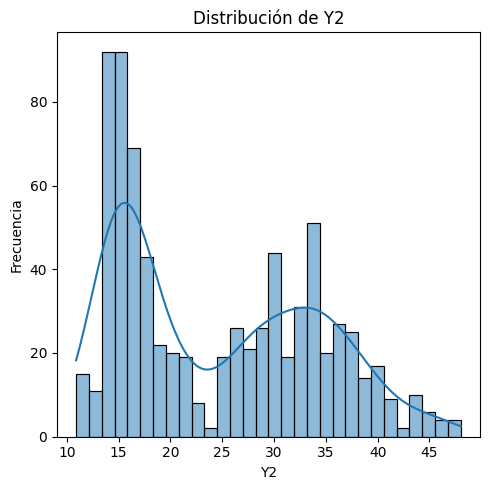

In [6]:
# Gráfica 1: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X1'], kde=True, bins=30)
plt.title('Distribución de X1')
plt.xlabel('X1')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 2: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X2'], kde=True, bins=30)
plt.title('Distribución de X2')
plt.xlabel('X2')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 3: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X3'], kde=True, bins=30)
plt.title('Distribución de X3')
plt.xlabel('X3')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 5: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X4'], kde=True, bins=30)
plt.title('Distribución de X4')
plt.xlabel('X4')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 5: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X5'], kde=True, bins=30)
plt.title('Distribución de X5')
plt.xlabel('X5')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 6: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X6'], kde=True, bins=30)
plt.title('Distribución de X6')
plt.xlabel('X6')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 7: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X7'], kde=True, bins=30)
plt.title('Distribución de X7')
plt.xlabel('X7')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 8: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['X8'], kde=True, bins=30)
plt.title('Distribución de X8')
plt.xlabel('X8')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 9: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['Y1'], kde=True, bins=30)
plt.title('Distribución de Y1')
plt.xlabel('Y1')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 10: Distribución de variable numérica
plt.figure(figsize=(5, 5))
sns.histplot(datos_trabajo['Y2'], kde=True, bins=30)
plt.title('Distribución de Y2')
plt.xlabel('Y2')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

media

In [7]:
datos_trabajo[["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]].agg(["mean","median"])

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
mean,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307195,24.58776
median,0.750000,673.750000,318.5,183.750000,5.25,3.5,0.250000,3.0000,18.950000,22.08000


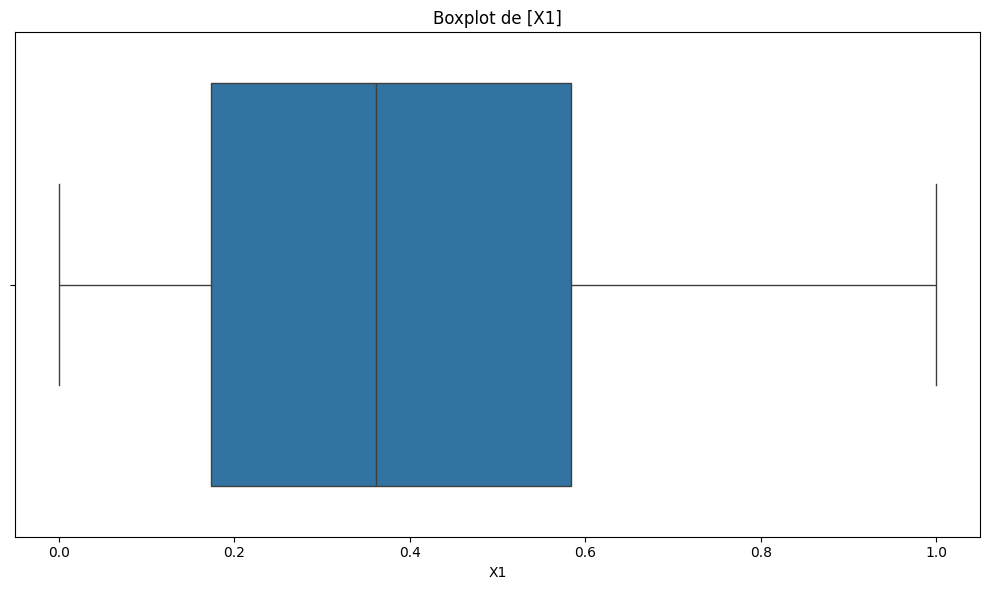

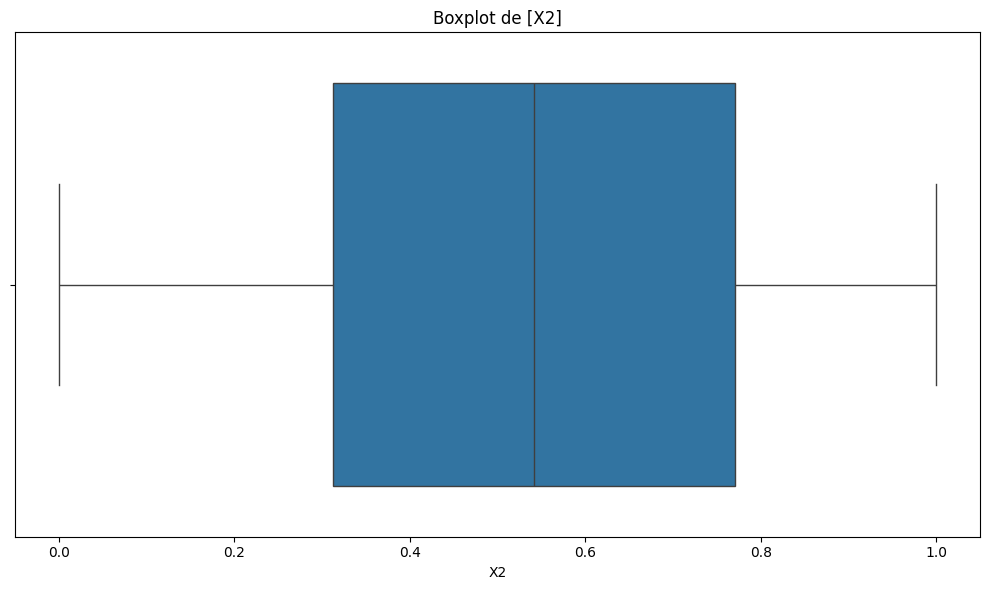

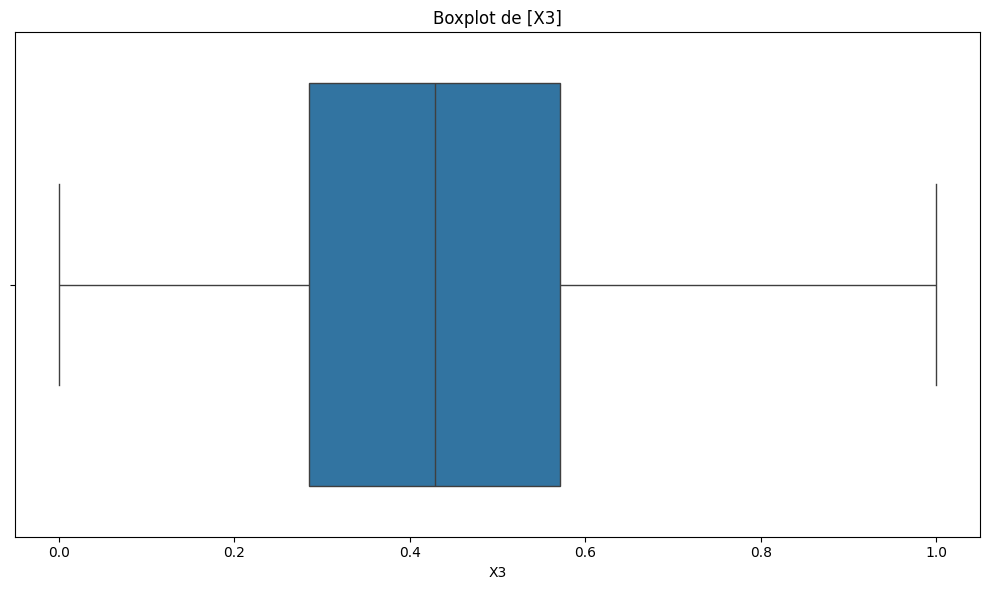

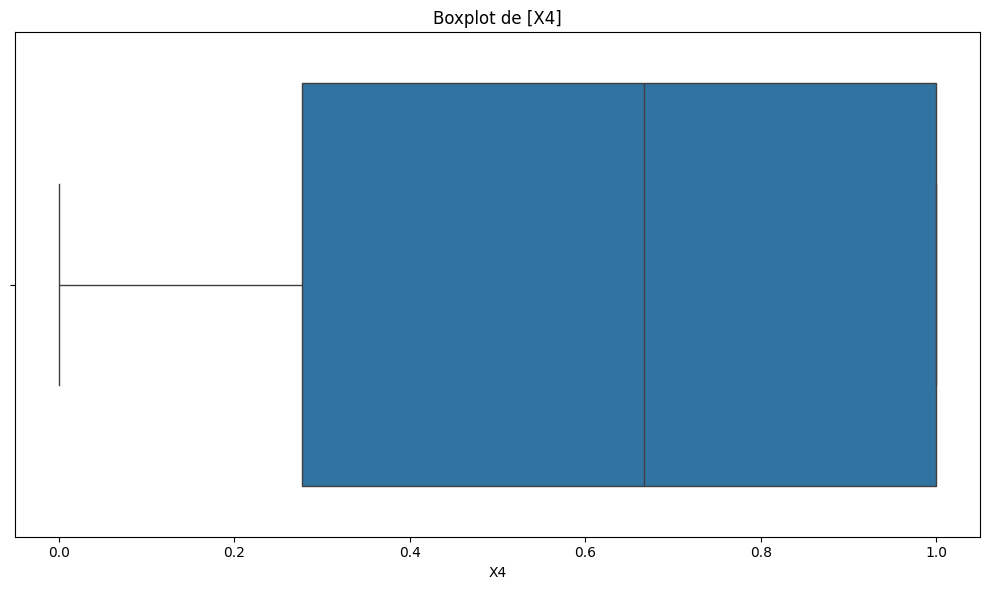

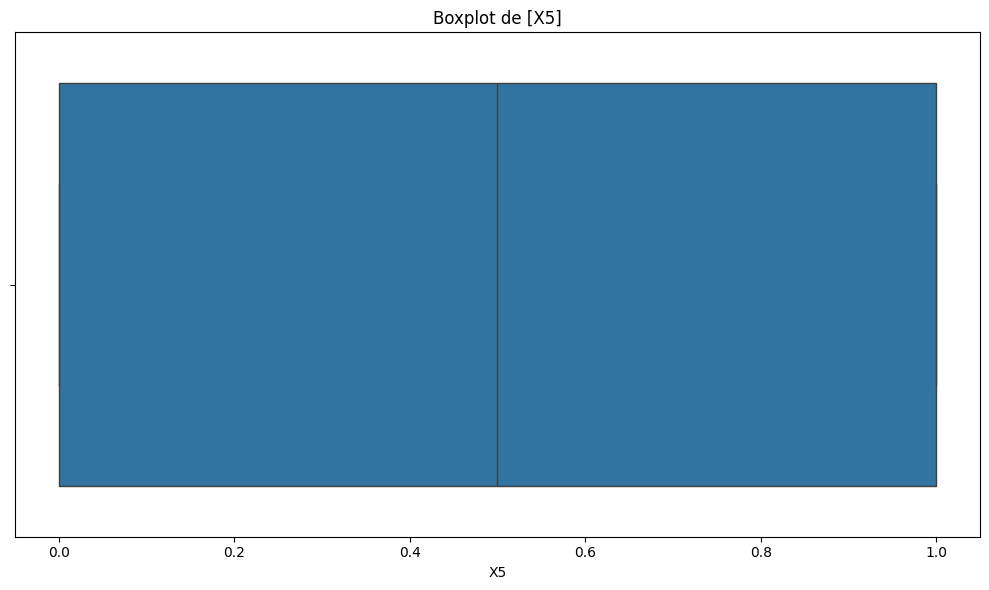

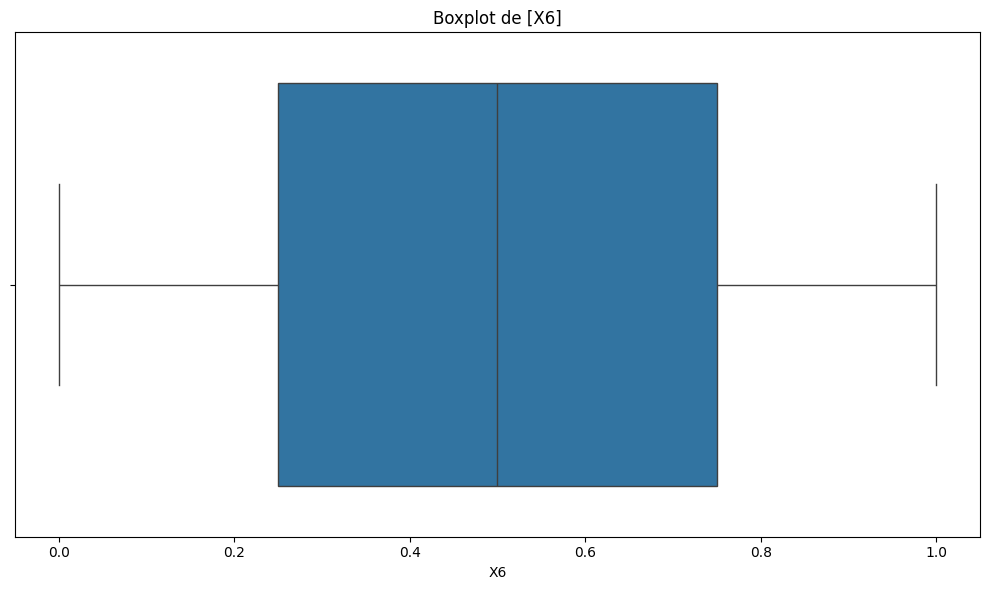

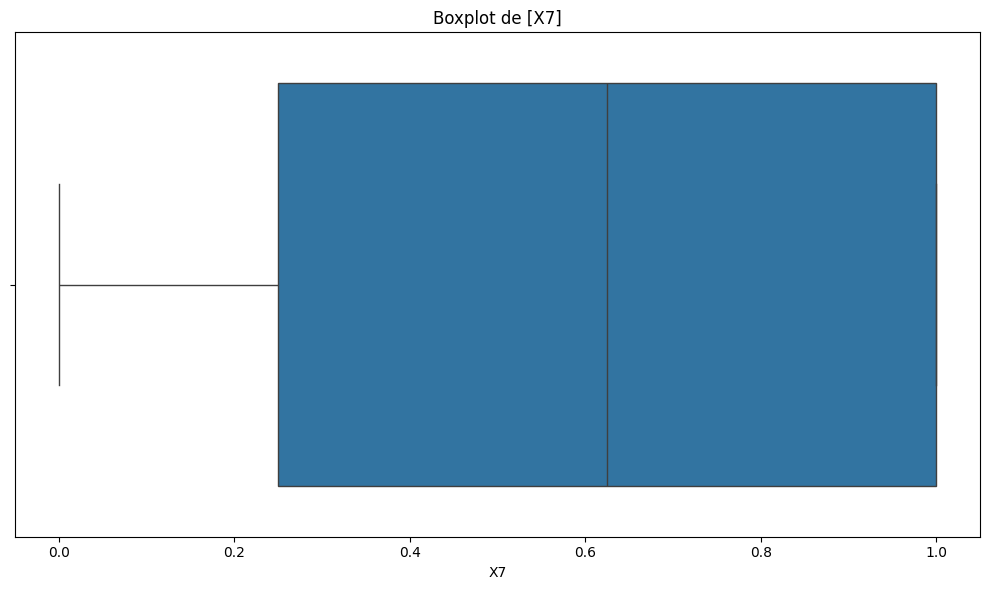

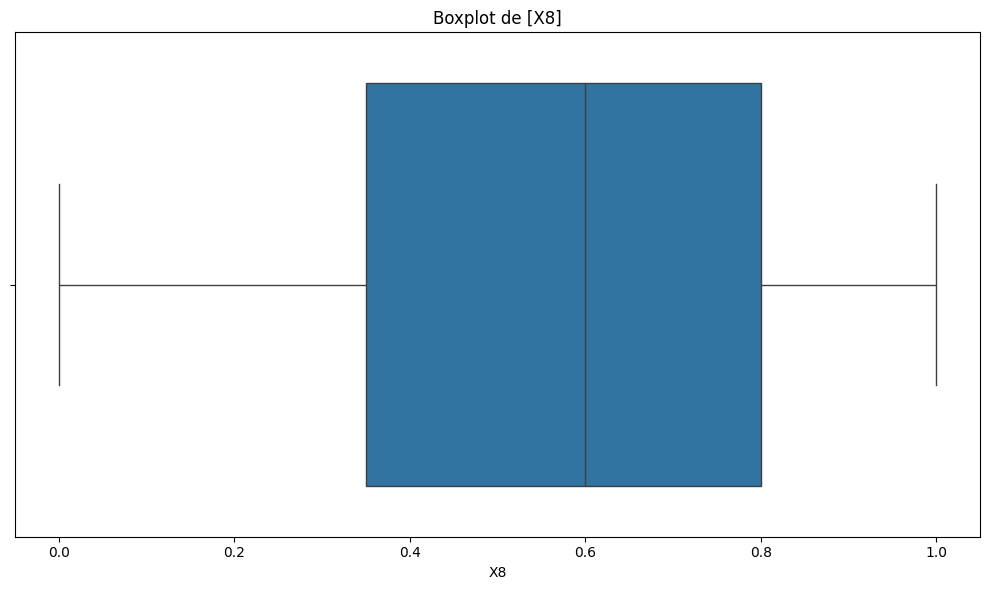

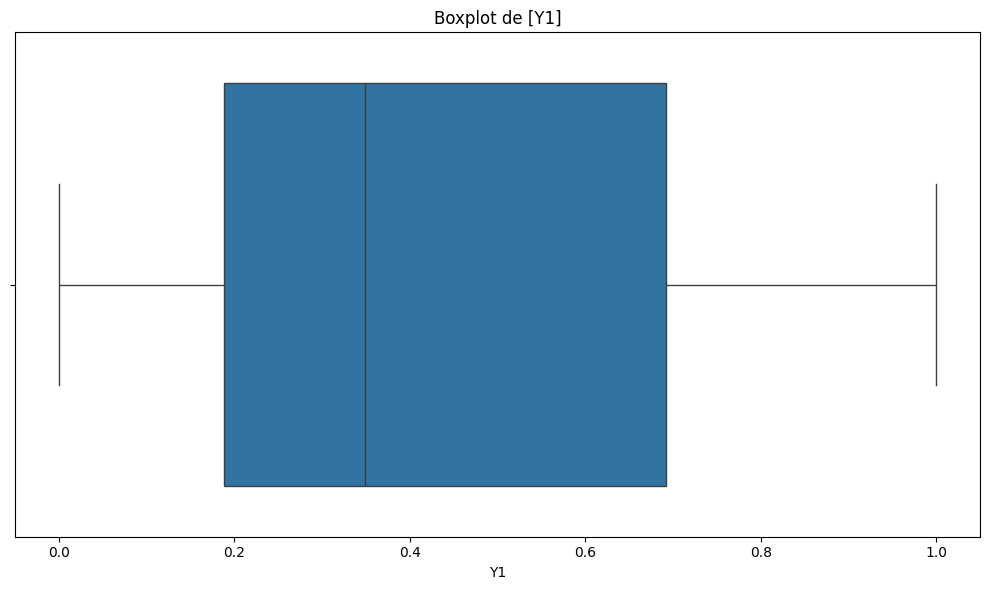

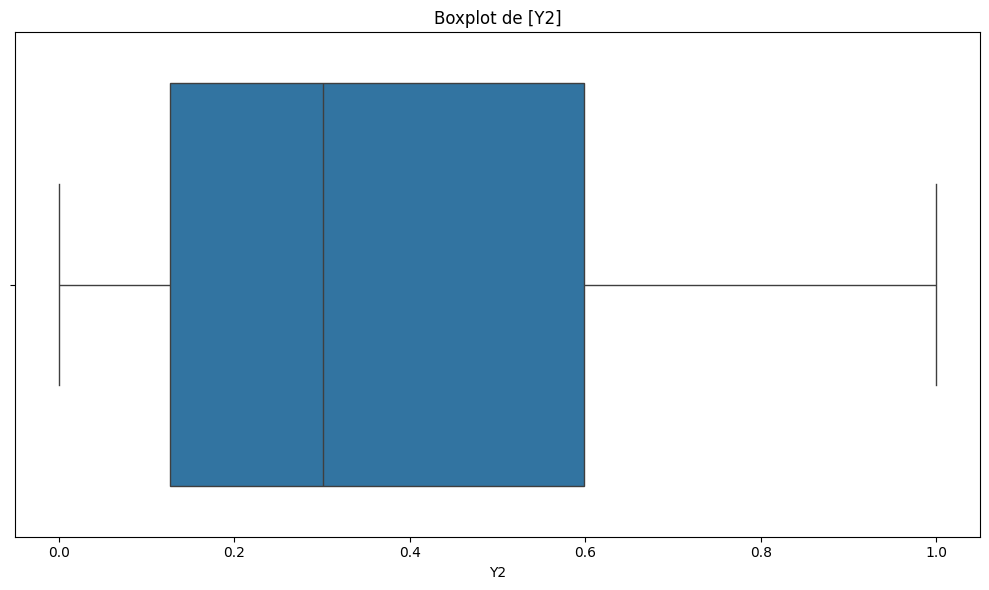

In [20]:
# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X1')
plt.title('Boxplot de [X1]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X2')
plt.title('Boxplot de [X2]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X3')
plt.title('Boxplot de [X3]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X4')
plt.title('Boxplot de [X4]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X5')
plt.title('Boxplot de [X5]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X6')
plt.title('Boxplot de [X6]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X7')
plt.title('Boxplot de [X7]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='X8')
plt.title('Boxplot de [X8]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='Y1')
plt.title('Boxplot de [Y1]')
plt.tight_layout()
plt.show()

# Gráfica 3: Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='Y2')
plt.title('Boxplot de [Y2]')
plt.tight_layout()
plt.show()

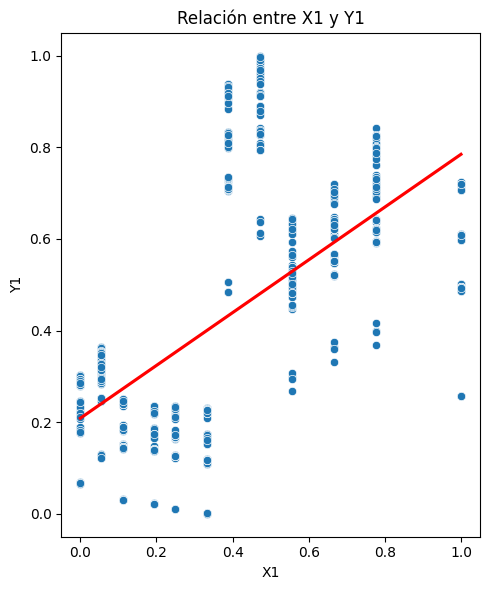

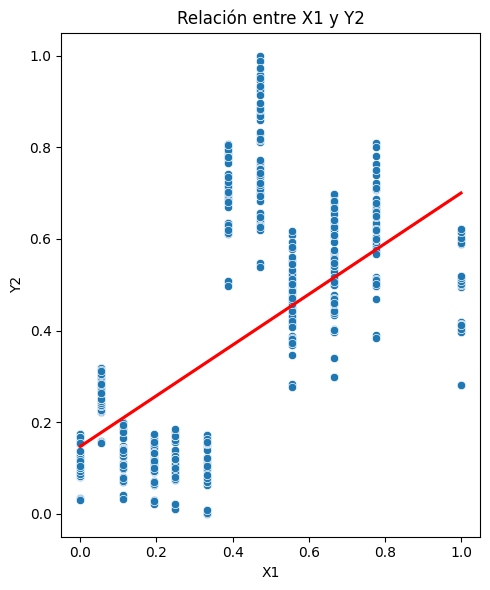

In [18]:
# Gráfica 4: Relación entre dos variables
plt.figure(figsize=(5, 6))
sns.scatterplot(data=datos_trabajo, x='X1', y='Y1')
sns.regplot(data=datos_trabajo, x='X1', y='Y1', color='red', ci=None, scatter=False)
plt.title('Relación entre X1 y Y1')
plt.tight_layout()
plt.show()

# Gráfica 4: Relación entre dos variables
plt.figure(figsize=(5, 6))
sns.scatterplot(data=datos_trabajo, x='X1', y='Y2')
sns.regplot(data=datos_trabajo, x='X1', y='Y2', color='red', ci=None, scatter=False)
plt.title('Relación entre X1 y Y2')
plt.tight_layout()
plt.show()



Paso 6: Conversión de Variables a Número


In [10]:
columnas_categoricas = datos_trabajo.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(columnas_categoricas)}")

# Aplicar LabelEncoder
le = LabelEncoder()
for col in columnas_categoricas:
    datos_trabajo[col] = le.fit_transform(datos_trabajo[col])
# Verificar conversión
print("\nTipos de datos después de conversión:")
print(datos_trabajo.dtypes)

Columnas categóricas: []

Tipos de datos después de conversión:
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object


Paso 7: Normalización


In [11]:
# Ver estadísticos antes de normalizar
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)
# Aplicar MinMaxScaler (escala 0-1)
scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.columns
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])
# Ver estadísticos después de normalizar
print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

=== ANTES DE NORMALIZACIÓN ===
    count        mean        std     min       25%     50%       75%     max
X1  768.0    0.764167   0.105777    0.62    0.6825    0.75    0.8300    0.98
X2  768.0  671.708333  88.086116  514.50  606.3750  673.75  741.1250  808.50
X3  768.0  318.500000  43.626481  245.00  294.0000  318.50  343.0000  416.50
X4  768.0  176.604167  45.165950  110.25  140.8750  183.75  220.5000  220.50
X5  768.0    5.250000   1.751140    3.50    3.5000    5.25    7.0000    7.00
X6  768.0    3.500000   1.118763    2.00    2.7500    3.50    4.2500    5.00
X7  768.0    0.234375   0.133221    0.00    0.1000    0.25    0.4000    0.40
X8  768.0    2.812500   1.550960    0.00    1.7500    3.00    4.0000    5.00
Y1  768.0   22.307195  10.090204    6.01   12.9925   18.95   31.6675   43.10
Y2  768.0   24.587760   9.513306   10.90   15.6200   22.08   33.1325   48.03

=== DESPUÉS DE NORMALIZACIÓN ===
    count      mean       std  min       25%       50%       75%  max
X1  768.0  0.40046

Paso 8: Correlación


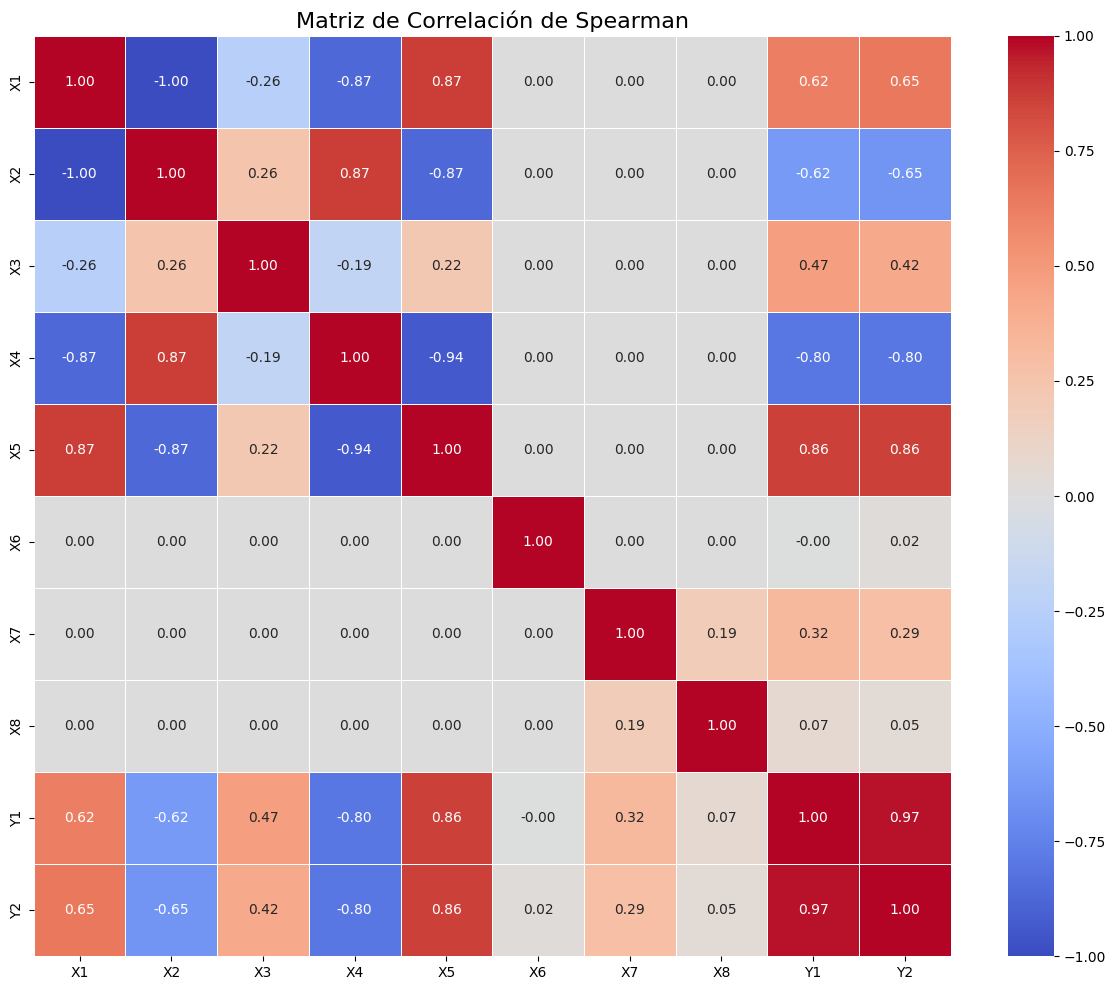

In [12]:
# Calcular matriz de correlación (Spearman es más robusto)
correlacion = datos_trabajo.corr(method='spearman')

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
# Identificar correlaciones fuertes
print("\n=== CORRELACIONES MÁS FUERTES ===")
# Obtener pares de correlación (excluyendo diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:  # Umbral de 0.5
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x:
abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")


=== CORRELACIONES MÁS FUERTES ===
X1 <-> X2: -1.000
Y1 <-> Y2: 0.973
X4 <-> X5: -0.937
X1 <-> X4: -0.871
X2 <-> X4: 0.871
X1 <-> X5: 0.869
X2 <-> X5: -0.869
X5 <-> Y2: 0.865
X5 <-> Y1: 0.861
X4 <-> Y1: -0.804
X4 <-> Y2: -0.803
X1 <-> Y2: 0.651
X2 <-> Y2: -0.651
X1 <-> Y1: 0.622
X2 <-> Y1: -0.622


Paso 9: Test de Normalidad

In [14]:
# Función para test de normalidad
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")

    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL"
                print(f"{col}:")
                print(f"  Estadístico W: {stat:.4f}")
                print(f"  P-valor: {p_value:.4f}")
                print(f"  Conclusión: {resultado}\n")

# Aplicar test
test_normalidad(datos_trabajo)

=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

X1:
  Estadístico W: 0.9334
  P-valor: 0.0000
  Conclusión: NO NORMAL

X2:
  Estadístico W: 0.9497
  P-valor: 0.0000
  Conclusión: NO NORMAL

X3:
  Estadístico W: 0.9269
  P-valor: 0.0000
  Conclusión: NO NORMAL

X4:
  Estadístico W: 0.7460
  P-valor: 0.0000
  Conclusión: NO NORMAL

X5:
  Estadístico W: 0.6366
  P-valor: 0.0000
  Conclusión: NO NORMAL

X6:
  Estadístico W: 0.8560
  P-valor: 0.0000
  Conclusión: NO NORMAL

X7:
  Estadístico W: 0.8435
  P-valor: 0.0000
  Conclusión: NO NORMAL

X8:
  Estadístico W: 0.9155
  P-valor: 0.0000
  Conclusión: NO NORMAL

Y1:
  Estadístico W: 0.9121
  P-valor: 0.0000
  Conclusión: NO NORMAL

Y2:
  Estadístico W: 0.9090
  P-valor: 0.0000
  Conclusión: NO NORMAL



Paso 10: Pregunta de Investigación




Paso 11: Ejercicio de Predicción



=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0000
Raíz del MSE (RMSE): 0.0000
Coeficiente R²: 1.0000

Interpretación R²: El modelo explica el 100.00% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
  Variable   Coeficiente
8       Y1  1.000000e+00
0       X1  1.267172e-15
1       X2  1.165734e-15
3       X4  7.632783e-16
4       X5  6.522560e-16
7       X8 -3.237970e-16
2       X3  8.153200e-17
5       X6  1.441989e-17
6       X7 -1.181780e-17


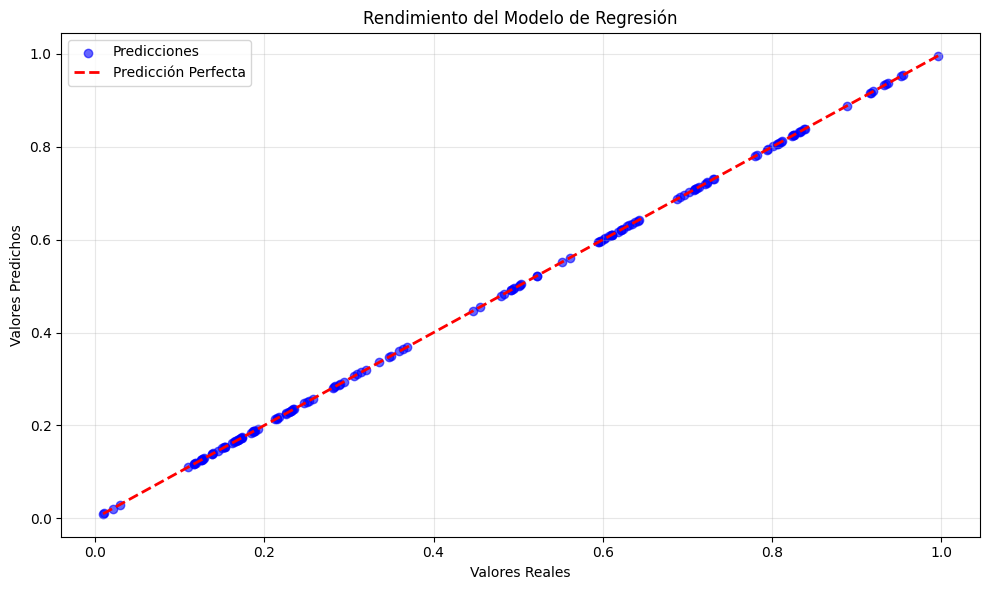

In [15]:
# Definir variable objetivo y predictoras
X = datos_trabajo.drop('Y2', axis=1)  # Variables predictoras (corregido 'y1' a 'Y1')
y = datos_trabajo['Y1']  # Variable a predecir (corregido 'variable_objetivo' a 'Y1')
# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42 )

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Realizar predicciones
y_pred = modelo.predict(X_test)
# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad")
# Coeficientes del modelo
coeficientes = pd.DataFrame({
'Variable': X.columns,
'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)
print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)
# Visualización: Valores reales vs predichos
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='blue',
label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
[y_test.min(), y_test.max()],
'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0000
Raíz del MSE (RMSE): 0.0000
Coeficiente R²: 1.0000

Interpretación R²: El modelo explica el 100.00% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
  Variable   Coeficiente
2       X4  1.000000e+00
0       X1  1.379455e-15
1       X3  1.110223e-15
3       X5 -6.106227e-16
7       Y1 -4.440892e-16
5       X7  2.810252e-16
8       Y2 -1.387779e-16
6       X8  3.919391e-17
4       X6 -7.589415e-18


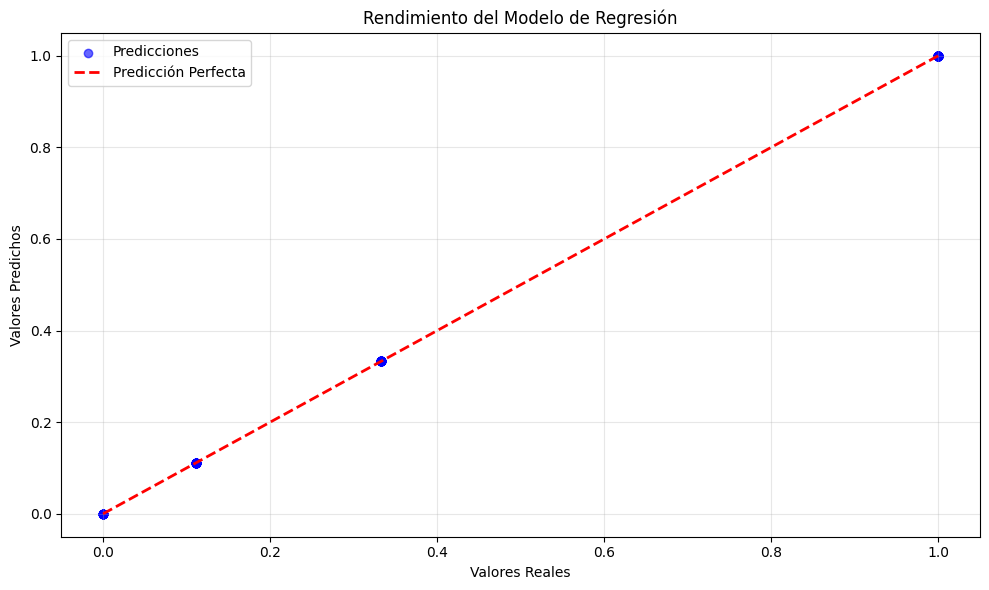

In [16]:
# Definir variable objetivo y predictoras
X = datos_trabajo.drop(['X2'], axis=1)  # Drop both 'X2' and the target 'X4' from features
y = datos_trabajo['X4']  # Variable a predecir
# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42 )

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Realizar predicciones
y_pred = modelo.predict(X_test)
# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad")
# Coeficientes del modelo
coeficientes = pd.DataFrame({
'Variable': X.columns,
'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)
print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)
# Visualización: Valores reales vs predichos
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='blue',
label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
[y_test.min(), y_test.max()],
'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0004
Raíz del MSE (RMSE): 0.0208
Coeficiente R²: 0.9951

Interpretación R²: El modelo explica el 99.51% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
  Variable  Coeficiente
0       X1    -0.712452
1       X3     0.180658
2       X5    -0.170223
6       Y1    -0.026913
7       Y2    -0.023097
4       X7     0.007802
3       X6    -0.001165
5       X8    -0.000238


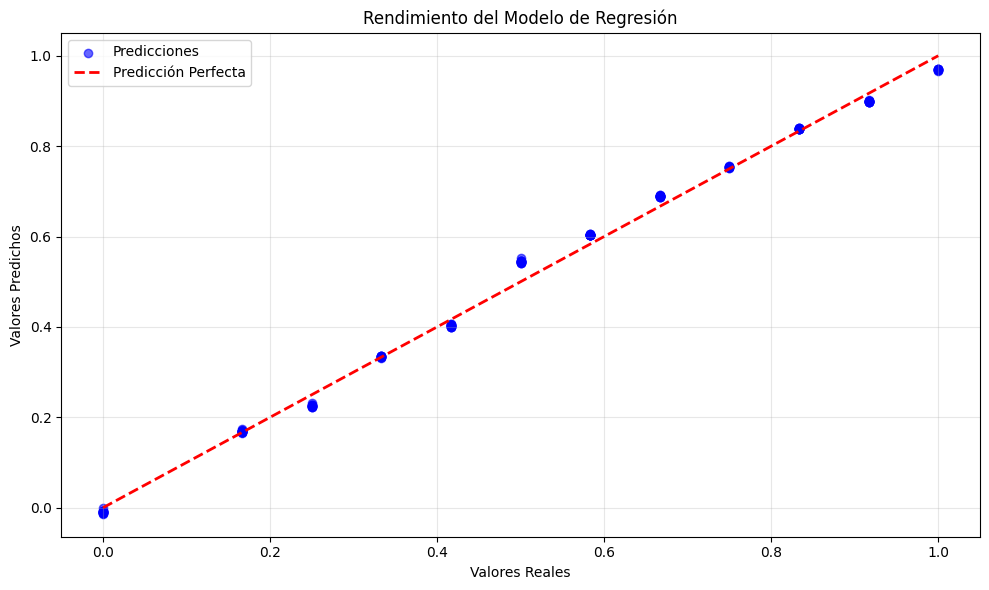

In [17]:
# Definir variable objetivo y predictoras
X = datos_trabajo.drop(['X2', 'X4'], axis=1)  # Corrected to drop multiple columns as a list with axis=1
y = datos_trabajo['X2']  # Variable a predecir (corregido 'variable_objetivo' a 'Y1')
# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42 )

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Realizar predicciones
y_pred = modelo.predict(X_test)
# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad")
# Coeficientes del modelo
coeficientes = pd.DataFrame({
'Variable': X.columns,
'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)
print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)
# Visualización: Valores reales vs predichos
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='blue',
label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
[y_test.min(), y_test.max()],
'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()